In [17]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
%matplotlib inline

In [18]:
pwd

'C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models\\Simple Regression Models'

In [19]:
df=pd.read_csv('C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models\\Sample.csv')
df.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301


In [20]:
cdf=df[['CO2_EMISSIONS','CYLINDERS']]
cdf.head(9)

,CO2_EMISSIONS,CYLINDERS
0,191,4
1,191,4
2,265,6
3,267,6
4,301,6
5,232,4
6,221,4
7,223,4
8,311,6


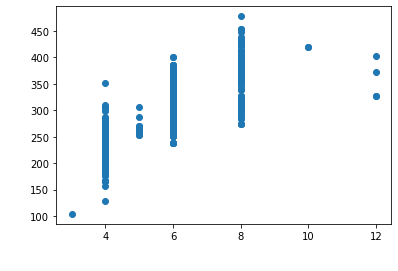

In [21]:
plt.scatter(cdf.CYLINDERS,cdf.CO2_EMISSIONS)
plt.ylabel("CO2 Emissions",color='white',size=20)
plt.xlabel("No of Cylinders",color='white',size=20)
plt.show()

In [22]:
#Training of the model
msk=np.random.rand(len(df))<0.3
train=cdf[msk]
test=cdf[~msk]

In [23]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['CYLINDERS']])
train_y=np.asanyarray(train[['CO2_EMISSIONS']])
regr.fit(train_x,train_y)
print("The Coefficient is :",regr.coef_)
print("The intercept is:",regr.intercept_)

The Coefficient is : [[32.48852816]]
The intercept is: [102.69632858]


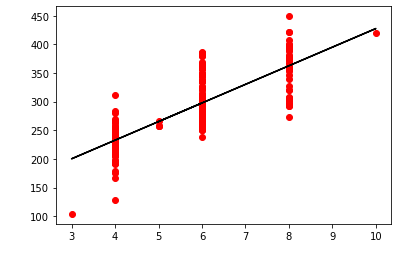

In [24]:
#plotting the trained model
plt.scatter(train.CYLINDERS,train.CO2_EMISSIONS,color='red')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],color='black')
plt.xlabel("No of Cylinders",size=20,color='white')
plt.ylabel("Co2 Emissions",size=20,color='white')
plt.show()

In [25]:
#testing the model
test_x=np.asanyarray(test[['CYLINDERS']])
test_y=np.asanyarray(test[['CO2_EMISSIONS']])
test_y_hat=regr.predict(test_x)

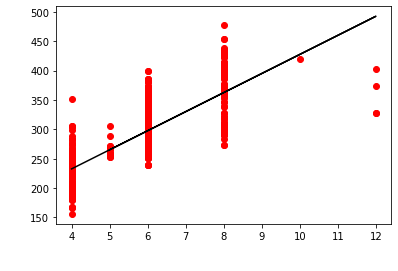

In [26]:
#PLotting the tested model
plt.scatter(test.CYLINDERS,test.CO2_EMISSIONS,color='red')
plt.plot(test_x,regr.coef_[0][0]*test_x+regr.intercept_[0],color='black')
plt.xlabel("No of Cylinders",size=20,color='white')
plt.ylabel("Co2 Emissions",size=20,color='white')
plt.show()

In [27]:
#Evaluation
from sklearn.metrics import r2_score
print("The MAE is : %.2f" %np.mean(np.absolute(test_y_hat-test_y)))
print("The MSE is : %.2f" %np.mean((test_y_hat-test_y)**2))
print("The R2 Score is : %.2f" %r2_score(test_y_hat,test_y))

The MAE is : 33.36
The MSE is : 1742.30
The R2 Score is : 0.32
